# Plot PSD for dataset

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import signal

In [23]:
def plot_PSD(zero, one):
    psds_zero = []
    psds_one = []

    freqs = signal.welch(zero[0])[0]
    for zero_elem in zero:
        _, psd = signal.welch(zero_elem)
        psds_zero.append(psd)

    psds_zero = np.array(psds_zero).mean(axis=0)

    for one_elem in one:
        _, psd = signal.welch(one_elem)
        psds_one.append(psd)

    psds_one = np.array(psds_one).mean(axis=0)

    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot(1, 1, 1)
    plt.semilogx(freqs, psds_zero, label='<5 IEDs in next 10 seconds')
    plt.semilogx(freqs, psds_one, label='>=5 IEDs in next 10 seconds')
    plt.title('Average power spectral density')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    ax.set_yscale('log')
    # plt.xlim([0, 5e-2])
    plt.legend()
    plt.tight_layout()

8.238643634037109


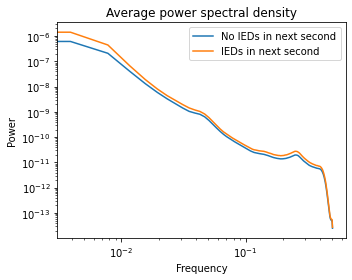

In [20]:
X = np.load('Data/ref_L6_window_1_chans_12/X.npy')
y = np.load('Data/ref_L6_window_1_chans_12/y.npy')

y = 1 * (y > 0)
zero = X[y == 0]
one = X[y == 1]

print(zero.shape[0] / one.shape[0])
plot_PSD(zero, one)

6.07037643207856


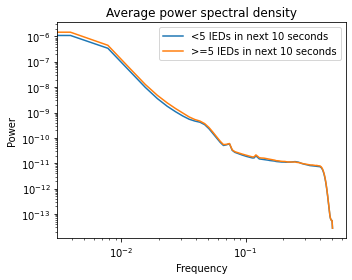

In [24]:
X = np.load('Data/ref_L6_window_10s_chans_12/X.npy')
y = np.load('Data/ref_L6_window_10s_chans_12/y.npy')

y = 1 * (y > 4)
zero = X[y == 0]
one = X[y == 1]

print(zero.shape[0] / one.shape[0])
plot_PSD(zero, one)